## Experimenting with KERES_OCR, PYTESSERACT and EASYOCR Python OCR Libraries

In [6]:
import os

dir = './problematic_samples/tif_samples_0/'
image_files = [dir + file_name for file_name in os.listdir(dir)]
image_files.sort()

### Preparing Images with ImageMagick (morph)

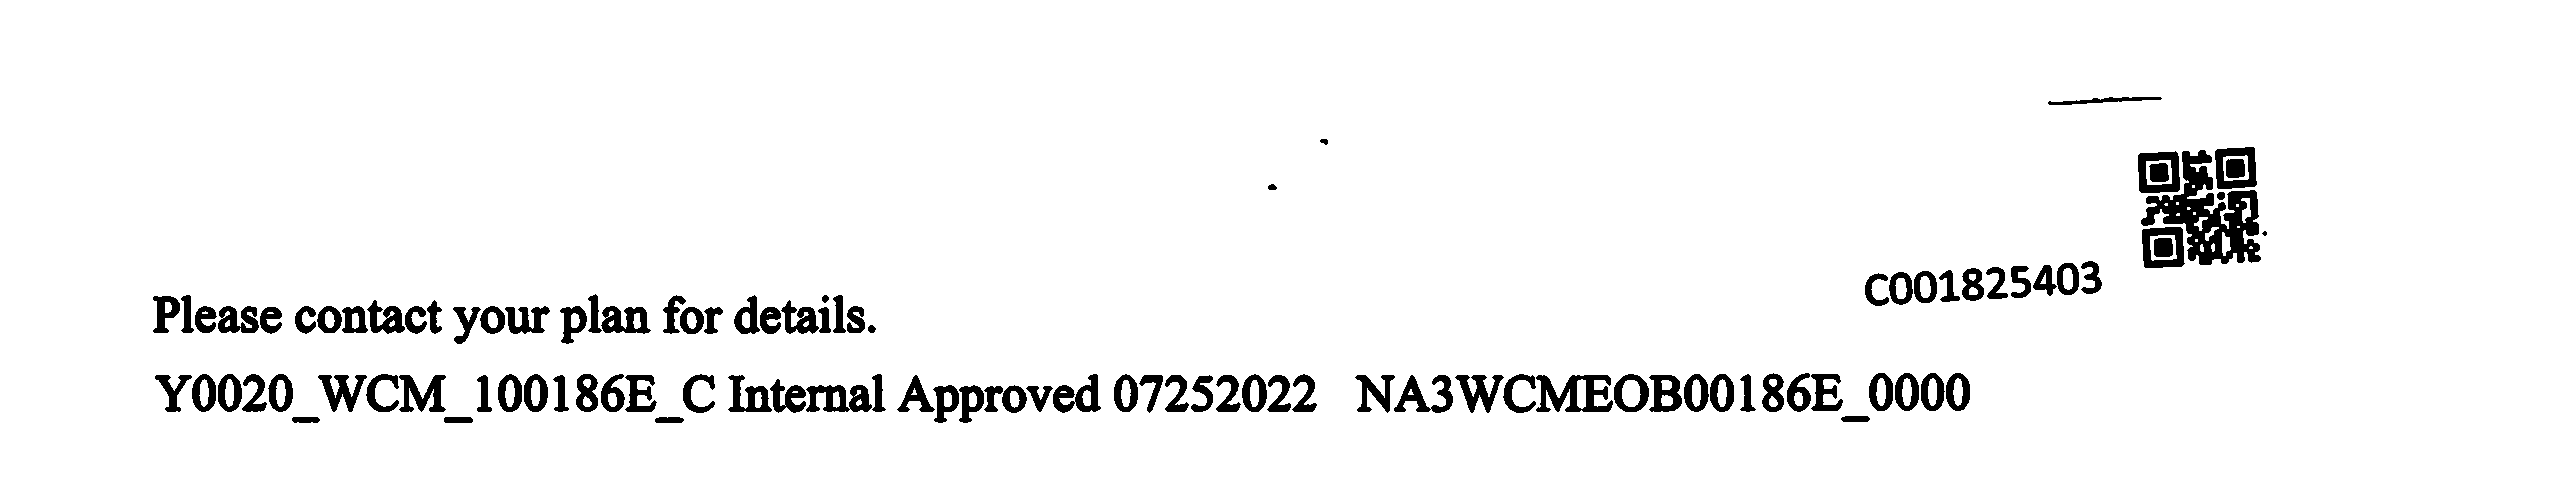

C001825403-00-bottom.tif


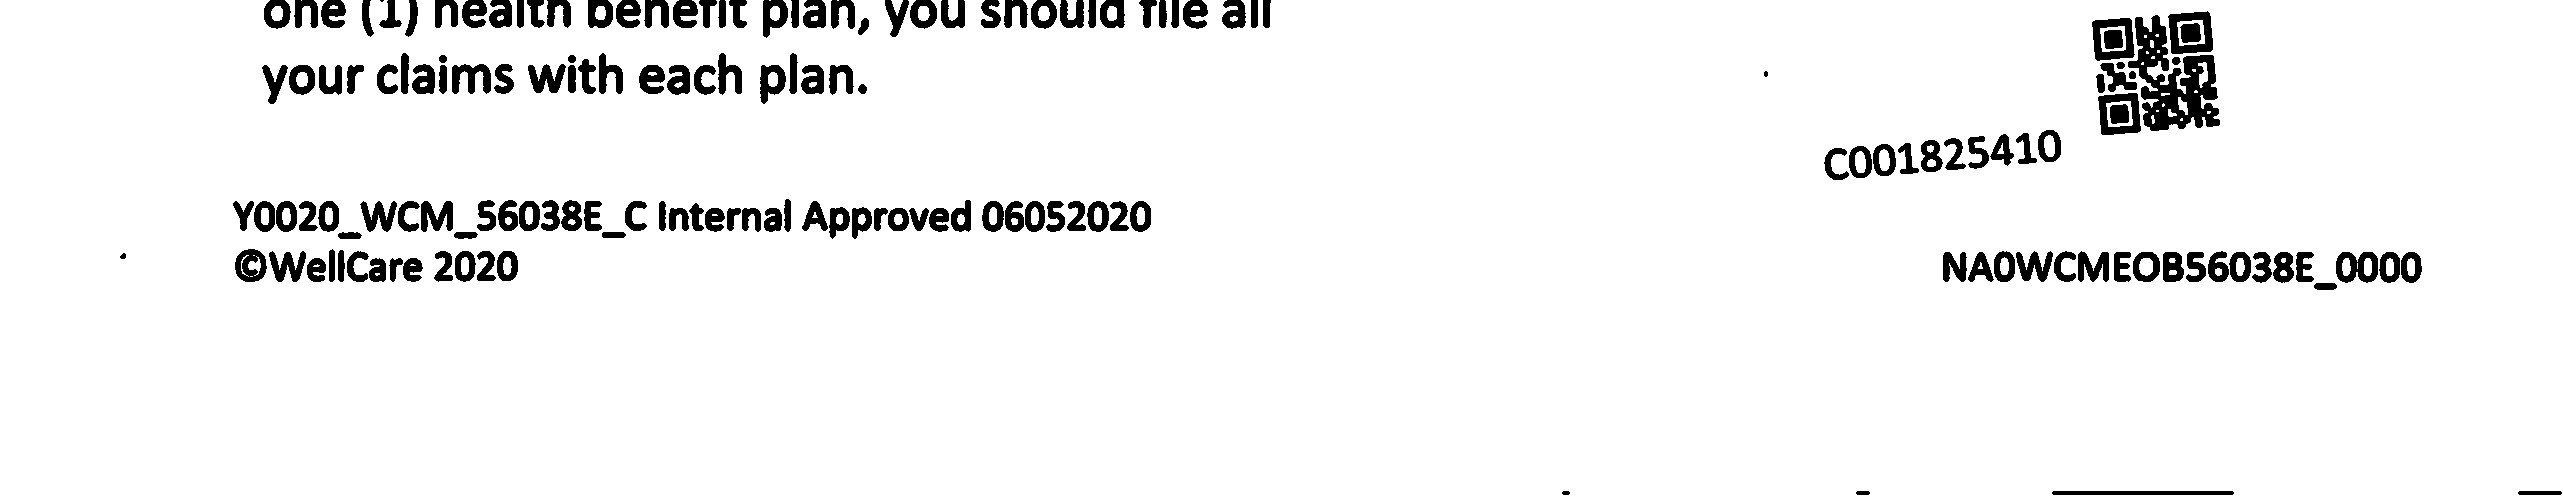

C001825410-00-bottom.tif


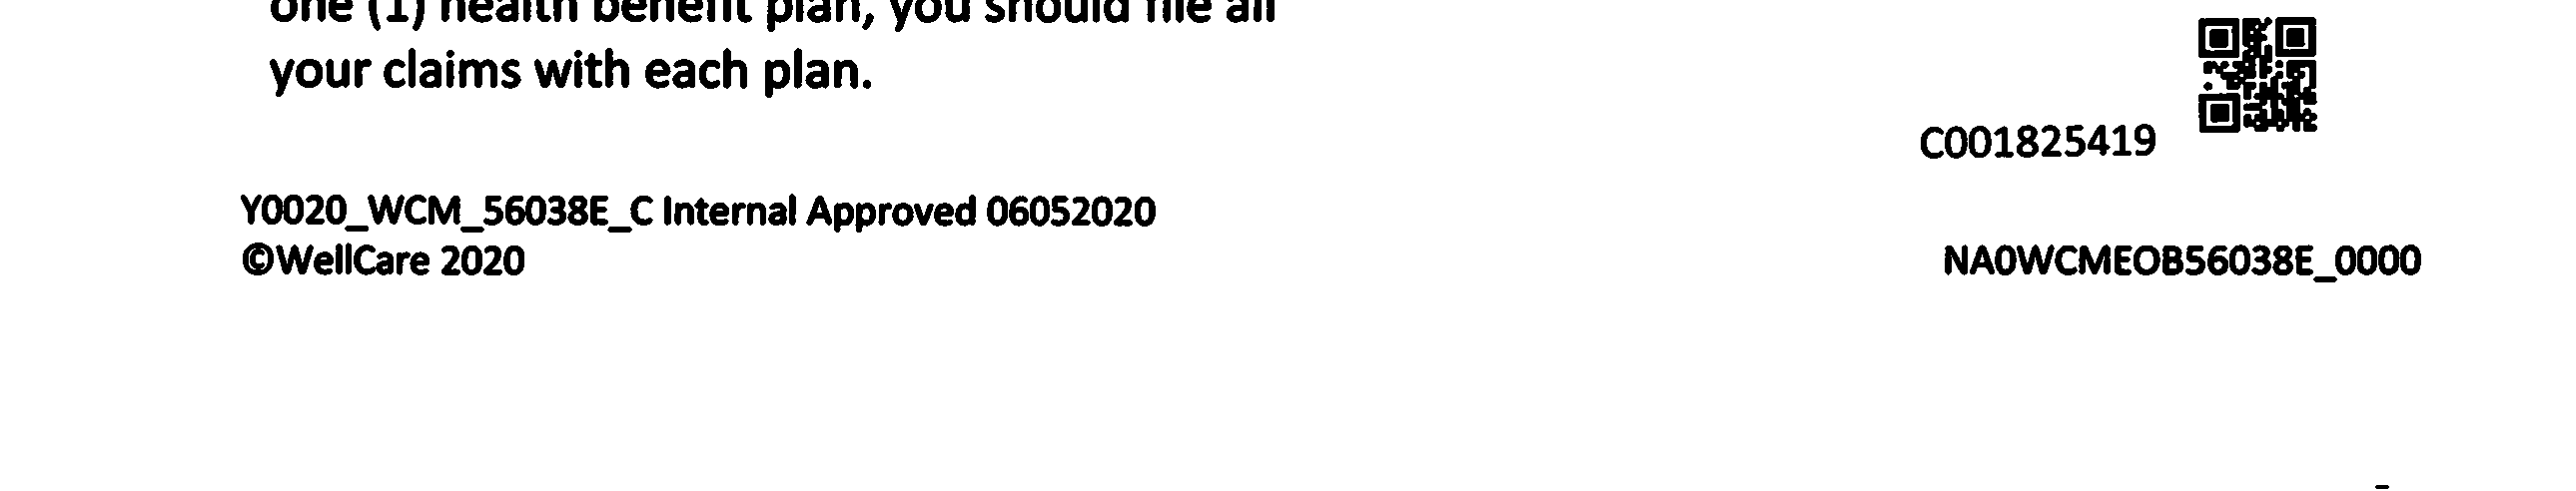

C001825419-00-bottom.tif


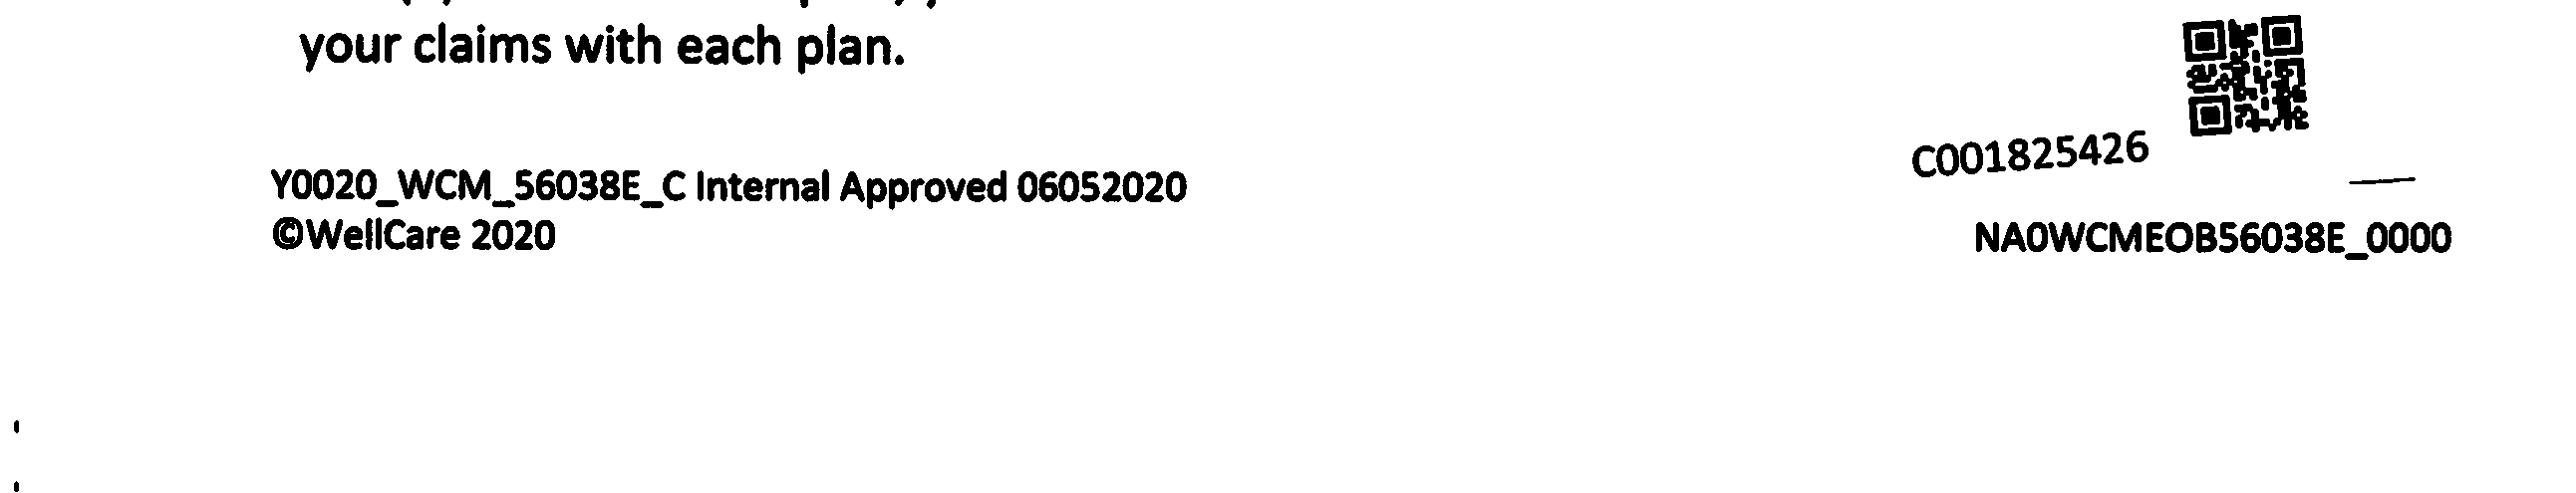

C001825426-00-bottom.tif


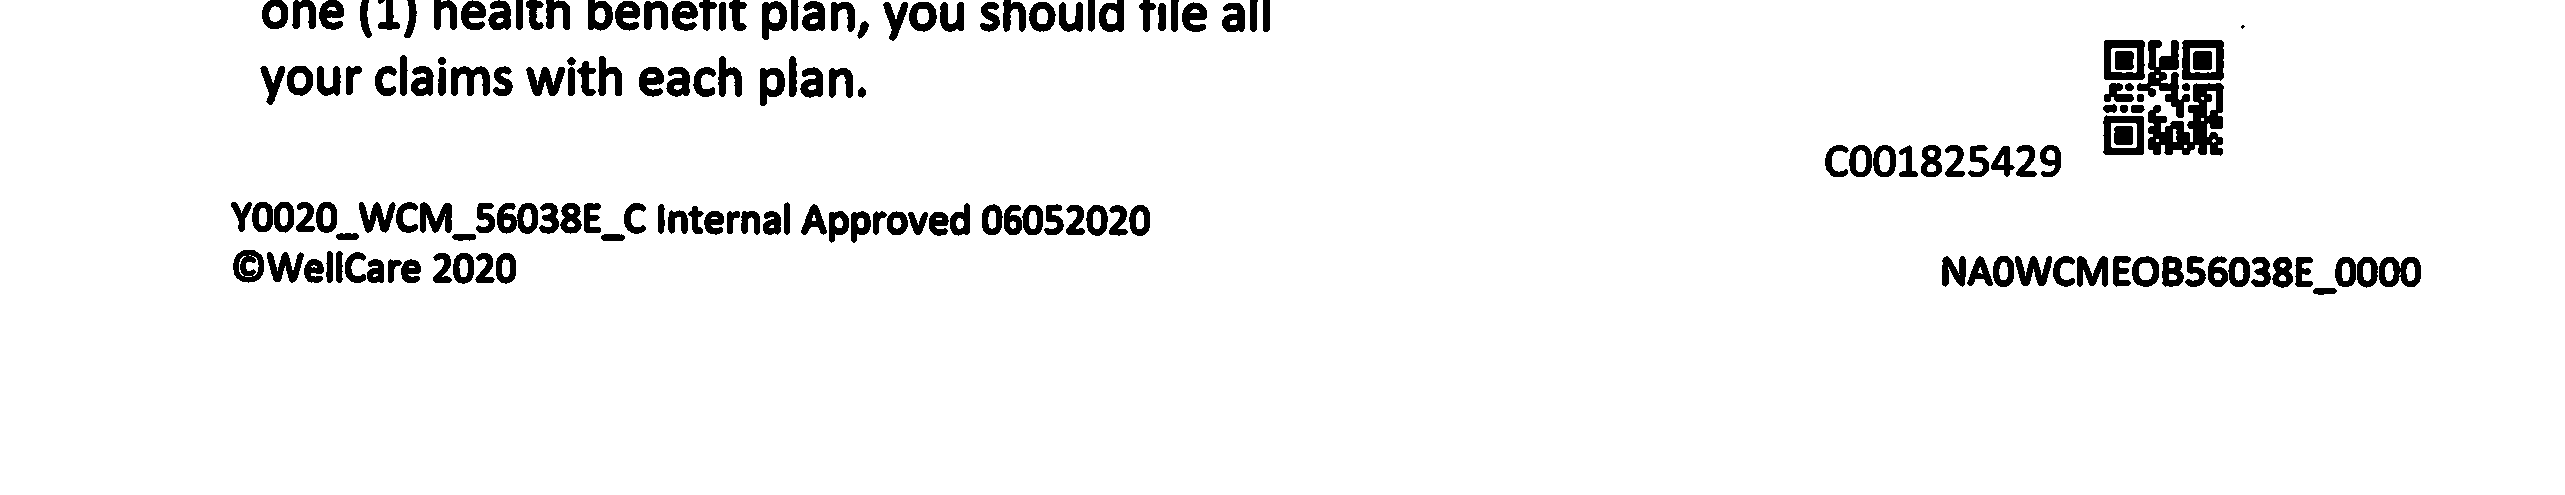

C001825429-00-bottom.tif


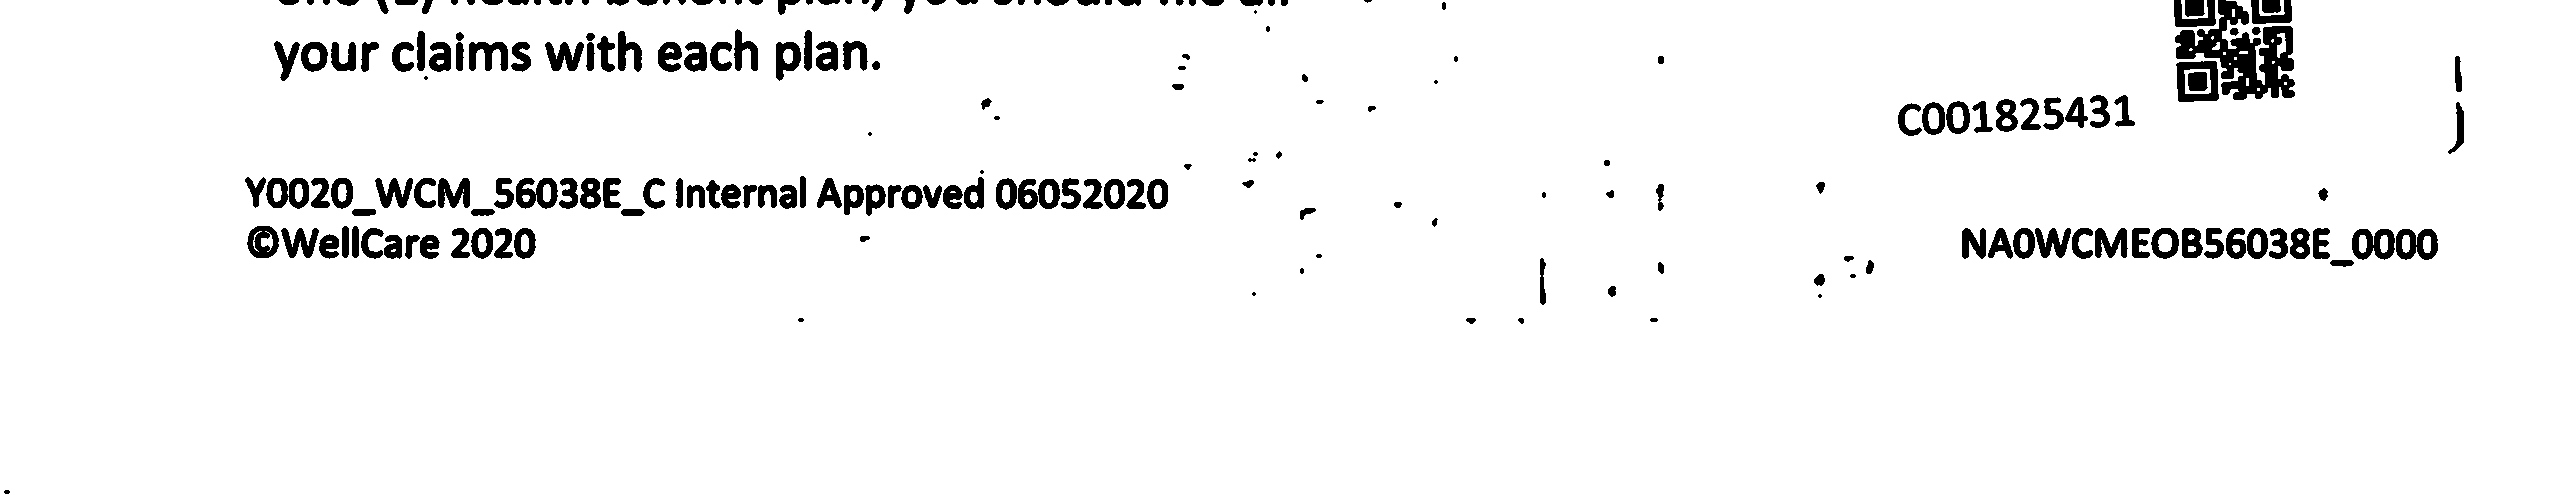

C001825431-00-bottom.tif


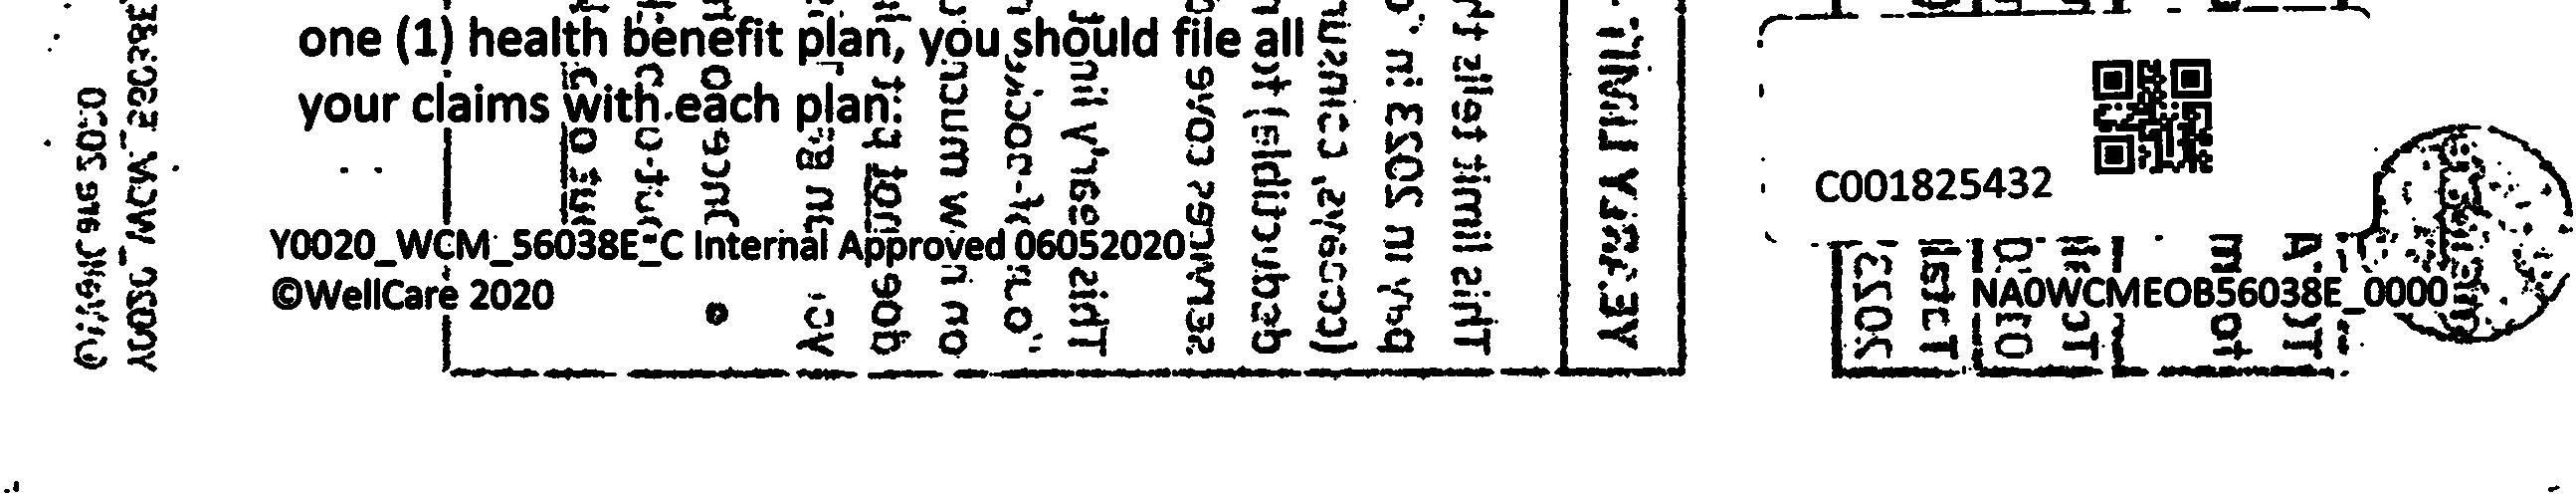

C001825432-00-bottom.tif


['problematic_samples/tif-samples-smoothened/C001604822-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001592553-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001592550-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001604821-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001825432-00-bottom_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001592558-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001592556-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001604816-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001825419-00-bottom_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001604815-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001592555-00-bottom_cropped_smooth.tif',
 'problematic_samples/tif-samples-smoothened/C001592557-00-

In [7]:
from wand.image import Image

def image_morphology(image_filename, dir):
    with Image(filename=image_filename) as img:
        with img.clone() as img_copy:
            # Trying to replicate the following command:
            # -type Grayscale
            img_copy.type = "grayscale"
            # -negate
            # img_copy.negate()
            # -define morphology:compose=darken
            img_copy.artifacts["morphology:compose"] = "Darken"
            # -morphology Thinning 'Rectangle:1x80+0+0<'
            img_copy.morphology(method="erode", kernel="Diamond:0.5")
            # -negate
            # img_copy.negate()
            display(img_copy)
            image_filename = image_filename.split("/")[-1]
            print(image_filename)
            # smmoothen_filename = f"{image_filename[:-4]}_smooth{image_filename[-4:]}"
            smmoothen_filename = f"{image_filename[:-4]}_smooth.tif"
            # print(smmoothen_filename)
            img_copy.save(filename=dir + smmoothen_filename)

dir_smooth = "problematic_samples/tif-samples-smoothened/"
for image_file in image_files:
    image_morphology(image_file, dir_smooth)

smoothened_image_files = [dir_smooth + file_name for file_name in os.listdir("./" + dir_smooth)]
smoothened_image_files
 

### KERAS_OCR

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

images = [keras_ocr.tools.read(url) for url in smoothened_image_files]


# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(
    images,
    detection_kwargs={"detection_threshold": 0.95, "text_threshold": 0.5},
)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 10 * len(images)))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

### PYTESSERACT

In [10]:
from PIL import Image as PIL_IMAGE
import pytesseract
# import subprocess

pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/tesseract'


output = []
for f in smoothened_image_files:
    # f = 'problematic_samples/tif_samples_1/C001157780-00-bottom.tif'
    # f2 = f'{f[:-4]}-ha{f[-4:]}'
    # subprocess.run(['convert', f,'-morphology', 'Dilate', 'Disk:1.0', '-compress', 'group4', f2], check=True)
    # subprocess.run(['convert', f, '+repage', '-crop', '10x10 +10 +10', '-compress', 'group4', f2], check=True)
    data = pytesseract.image_to_data(PIL_IMAGE.open(f), output_type=pytesseract.Output.DICT)

    # Iterate over the detected words
    for i, word_text in enumerate(data['text']):
        confidence = float(data['conf'][i])
        print(f"Word: {word_text}, Confidence: {confidence}")
        if word_text.find('\n') == -1:
            print('HHHHHH')
            break
        file_name = f.split('/')[-1]
        output.append(f'{file_name}:\n\n{word_text}\n')

with open('output.txt', 'w') as f: 
    f.write(f'\n**************************************************************************\n'.join(output))

Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH
Word: , Confidence: -1.0
HHHHHH


### EASYOCR

In [ ]:
# HAS CONFLICT WITH WAND IMAGE (Restart the kernel if Wand Image is already imported) and HAD SUCCESS ONLY WITH JPEGs.

import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory


In [ ]:
# output = []
# for f in smoothened_image_files:
#     text = reader.readtext(f'./{f}')
#     file_name = f.split('/')[-1]
#     output.append(f'{file_name}:\n\n{text}\n')

# with open('output.txt', 'w') as f: 
#     f.write(f'\n**************************************************************************\n'.join(output))

result = reader.readtext('./problematic_samples/C001604823-00-bottom_smooth_cropped.jpg')
result